**UTS MODEL DEPLOYMENT**



BRANDON RITCHIE YANG - 2602075491

Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

Read File

In [ ]:
df = pd.read_csv('/content/data_A.csv')

Data Preparation

In [ ]:
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,7317,15637411,Tochukwu,749.0,France,Male,30.0,1,0.00,2,0,0,126551.65,1
1,1,11125,15745307,Martin,683.0,Germany,Male,32.0,7,121887.91,1,1,1,176570.46,0
2,2,45720,15677382,Aitken,711.0,Spain,Female,33.0,5,0.00,2,1,0,162703.80,0
3,3,74042,15694450,Tuan,722.0,France,Female,28.0,4,0.00,2,1,1,76615.31,0
4,4,109985,15734987,Aitken,754.0,France,Female,67.0,3,0.00,2,1,1,114514.92,0


In [ ]:
df.shape

(41258, 15)

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

In [ ]:
df.isnull().sum()

Unnamed: 0          0
id                  0
CustomerId          0
Surname             0
CreditScore        20
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
churn               0
dtype: int64

Bisa dilihat ada sebanyak 20 null value di kolom "CreditScore". Null value ini harus diatasi agar tidak mengganggu kinerja model nantinya.

In [ ]:
df.describe()

,Unnamed: 0,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,41258.00000,41258.000000,4.125800e+04,41238.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000
mean,20628.50000,82427.097751,1.569184e+07,657.212619,38.113117,5.020408,55845.162728,1.554801,0.753817,0.501018,112741.993562,0.208760
std,11910.30304,47686.245457,7.150911e+04,80.324627,8.825835,2.798614,62912.415027,0.545583,0.430791,0.500005,50293.991764,0.406427
min,0.00000,6.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,10314.25000,41244.500000,1.563291e+07,598.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74838.207500,0.000000
50%,20628.50000,82102.000000,1.569016e+07,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,1.000000,118711.750000,0.000000
75%,30942.75000,123874.250000,1.575690e+07,711.000000,42.000000,7.000000,120139.762500,2.000000,1.000000,1.000000,155642.645000,0.000000
max,41257.00000,165030.000000,1.581569e+07,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   id               41258 non-null  int64  
 2   CustomerId       41258 non-null  int64  
 3   Surname          41258 non-null  object 
 4   CreditScore      41238 non-null  float64
 5   Geography        41258 non-null  object 
 6   Gender           41258 non-null  object 
 7   Age              41258 non-null  float64
 8   Tenure           41258 non-null  int64  
 9   Balance          41258 non-null  float64
 10  NumOfProducts    41258 non-null  int64  
 11  HasCrCard        41258 non-null  int64  
 12  IsActiveMember   41258 non-null  int64  
 13  EstimatedSalary  41258 non-null  float64
 14  churn            41258 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


In [ ]:
df['id'].value_counts()

id
7317      1
32465     1
81821     1
63216     1
98863     1
         ..
159995    1
16993     1
2266      1
79836     1
16486     1
Name: count, Length: 41258, dtype: int64

In [ ]:
df['CustomerId'].value_counts()

CustomerId
15682355    30
15595588    27
15585067    26
15585835    26
15648067    26
            ..
15567452     1
15749955     1
15662903     1
15598876     1
15714355     1
Name: count, Length: 13187, dtype: int64

In [ ]:
df['Unnamed: 0'].value_counts()

Unnamed: 0
0        1
27478    1
27500    1
27501    1
27502    1
        ..
13754    1
13755    1
13756    1
13757    1
41257    1
Name: count, Length: 41258, dtype: int64

In [ ]:
df['Surname'].value_counts()

Surname
Hsia         624
T'ien        529
Ts'ui        419
Maclean      409
Hs?          399
            ... 
Bukowski       1
Averyanov      1
Emenike        1
McKee          1
Yusupov        1
Name: count, Length: 2263, dtype: int64

In [ ]:
df['CreditScore'].value_counts()

CreditScore
850.0    613
678.0    590
667.0    410
684.0    405
705.0    405
        ... 
436.0      1
419.0      1
382.0      1
808.0      1
365.0      1
Name: count, Length: 443, dtype: int64

In [ ]:
df['Geography'].value_counts()

Geography
France     23518
Spain       9114
Germany     8626
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
Male      23341
Female    17917
Name: count, dtype: int64

In [ ]:
df['Tenure'].value_counts()

Tenure
2     4555
4     4482
8     4415
7     4370
5     4303
3     4178
9     4124
1     4123
6     3996
10    1492
0     1220
Name: count, dtype: int64

In [ ]:
df['NumOfProducts'].value_counts()

NumOfProducts
2    21130
1    19303
3      715
4      110
Name: count, dtype: int64

In [ ]:
df['HasCrCard'].value_counts()

HasCrCard
1    31101
0    10157
Name: count, dtype: int64

In [ ]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    20671
0    20587
Name: count, dtype: int64

In [ ]:
df['churn'].value_counts()

churn
0    32645
1     8613
Name: count, dtype: int64

In [ ]:
df = df.drop(columns = ['Unnamed: 0', 'id', 'Surname'])

Drop kolom yang tidak diperlukan. "Unnamed: 0" dan "id" merupakan kolom tanda pengenal dimana kolom tersebut bisa digantikan dengan index data yang sudah ada, kedua kolom tersebut bisa dibilang hanya tanda pengenal karena memiliki unique value yang sama dengan jumlah data (41258). "Surname" di drop karena beberapa orang bisa saja memiliki surname yang sama dan tidak dapat digunakan sebagai tanda pengenal (sudah ada "CustomerId").

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       41258 non-null  int64  
 1   CreditScore      41238 non-null  float64
 2   Geography        41258 non-null  object 
 3   Gender           41258 non-null  object 
 4   Age              41258 non-null  float64
 5   Tenure           41258 non-null  int64  
 6   Balance          41258 non-null  float64
 7   NumOfProducts    41258 non-null  int64  
 8   HasCrCard        41258 non-null  int64  
 9   IsActiveMember   41258 non-null  int64  
 10  EstimatedSalary  41258 non-null  float64
 11  churn            41258 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 3.8+ MB


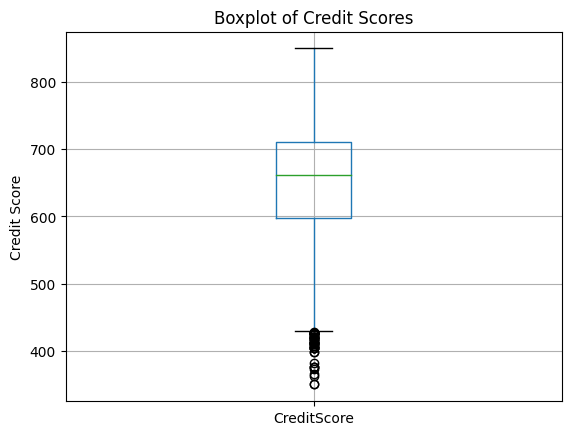

In [ ]:
df.boxplot(column = ['CreditScore'])
plt.title('Boxplot of Credit Scores')
plt.ylabel('Credit Score')
plt.show()

In [ ]:
CSMedian = df['CreditScore'].median()

In [ ]:
df['CreditScore'].fillna(CSMedian, inplace=True)

In [ ]:
df['CreditScore'].isnull().sum()

0

Seperti yang sudah diungkapkan di atas tadi, null value harus diatasi. Setelah melihat distribusi "CreditScore" menggunakan boxplot, terdapat beberapa outlier yang bisa dilihat di sekitar 400. Oleh karena itu, median digunakan untuk mengisi null value di "CreditScore".

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       41258 non-null  int64  
 1   CreditScore      41258 non-null  float64
 2   Geography        41258 non-null  object 
 3   Gender           41258 non-null  object 
 4   Age              41258 non-null  float64
 5   Tenure           41258 non-null  int64  
 6   Balance          41258 non-null  float64
 7   NumOfProducts    41258 non-null  int64  
 8   HasCrCard        41258 non-null  int64  
 9   IsActiveMember   41258 non-null  int64  
 10  EstimatedSalary  41258 non-null  float64
 11  churn            41258 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 3.8+ MB


In [ ]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,15637411,749.0,France,Male,30.0,1,0.00,2,0,0,126551.65,1
1,15745307,683.0,Germany,Male,32.0,7,121887.91,1,1,1,176570.46,0
2,15677382,711.0,Spain,Female,33.0,5,0.00,2,1,0,162703.80,0
3,15694450,722.0,France,Female,28.0,4,0.00,2,1,1,76615.31,0
4,15734987,754.0,France,Female,67.0,3,0.00,2,1,1,114514.92,0


In [ ]:
(df['Balance'] == 0).sum()

22306

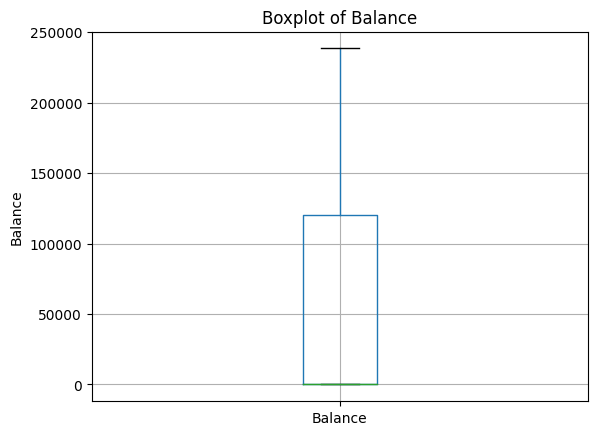

In [ ]:
df.boxplot(column = ['Balance'])
plt.title('Boxplot of Balance')
plt.ylabel('Balance')
plt.show()

In [ ]:
(df['Balance'] != 0).sum()

18952

Dalam kolom "Balance" ada lebih dari 50% data yang memiliki "Balance" dengan jumlah 0. Tetapi tidak ada outlier dalam kolom ini. Data "Balance" akan di keep untuk melengkapi informasi.

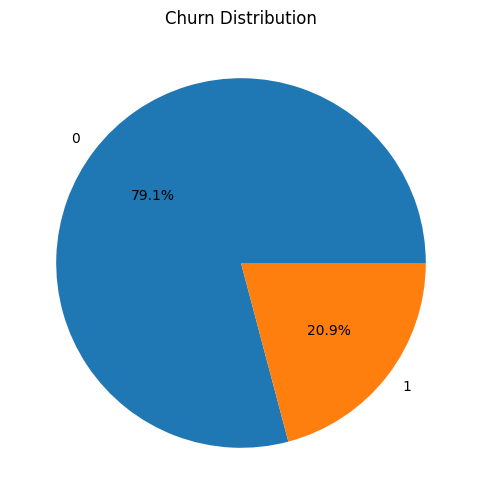

In [ ]:
churn_count = df['churn'].value_counts()

plt.figure(figsize = (6, 6))
plt.pie(churn_count, labels = churn_count.index, autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()

Distribusi data churn bisa dibilang kurang rata, yaitu sekitar 1:4 dan bisa saja menyebabkan kesalahan kepada model.

In [ ]:
df = df.drop('CustomerId', axis = 1)

Customer ID hanya merupakan identitas dari customer maka saya memutuskan untuk drop.

Split Data

In [ ]:
input_df = df.drop('churn', axis = 1)
output_df = df['churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, stratify = output_df, random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, stratify = y_test, random_state = 42)

print("Training set size:", len(x_train))
print("Validation set size:", len(x_val))
print("Testing set size:", len(x_test))

Training set size: 33006
Validation set size: 4126
Testing set size: 4126


Split data menjadi 80% train, 10% validation, 10% test

In [ ]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3465,592.0,Germany,Female,28.0,5,122934.72,2,0,0,111835.93
4132,714.0,France,Male,51.0,4,0.00,2,1,1,19700.24
23418,595.0,France,Female,43.0,10,0.00,1,1,0,181461.46
33727,678.0,Spain,Female,29.0,9,0.00,1,1,0,172939.30
4672,645.0,Spain,Male,26.0,4,0.00,2,1,0,91573.19


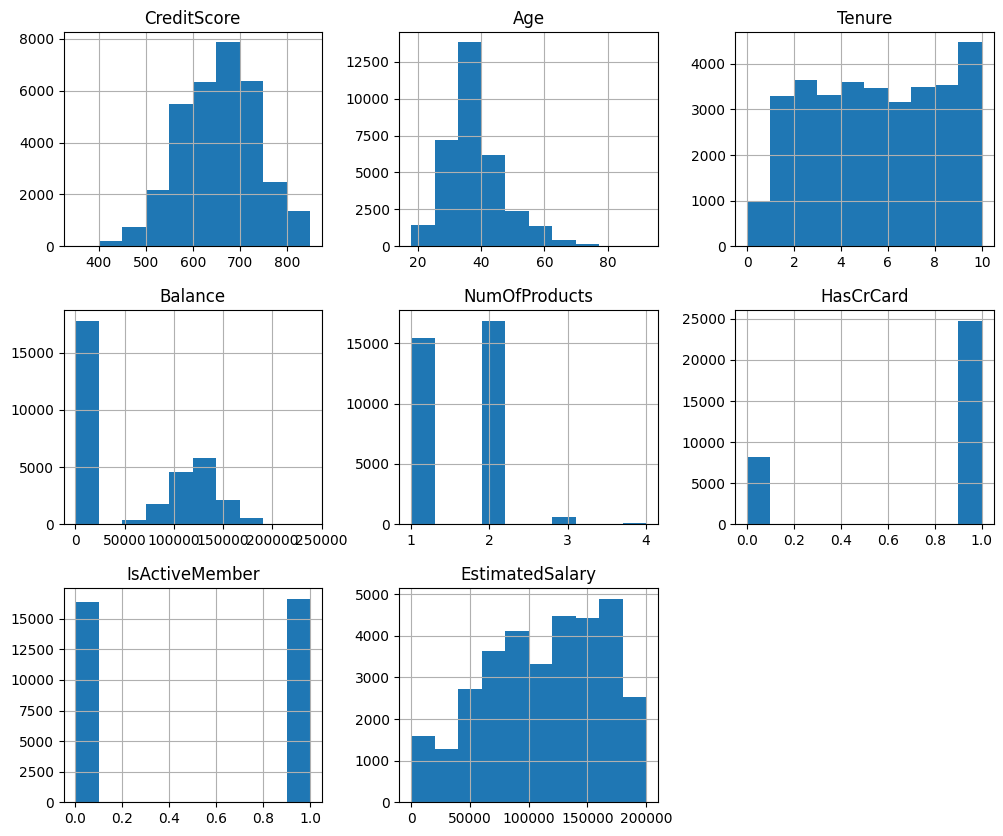

In [ ]:
x_train.hist(figsize = (12, 10))
plt.show()

Chart 1: Dari chart di atas ini bisa dilihat bahwa ada beberapa kolom seperti CustomerId, Tenure, HasCrCard, IsActiveMember dan EstimatedSalary yang terdistribusi dengan baik dan lumayan rata. Tetapi ada beberap kolom seperti CreditScore, Age, Balance dan NumOfProducts yang memiliki distribusi yang kurang rata.

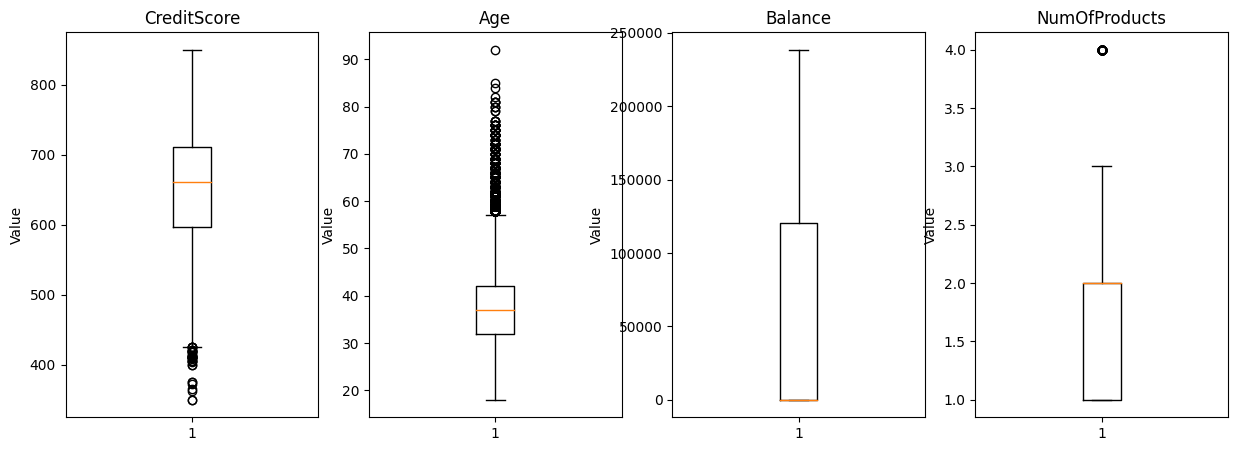

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].boxplot(x_train['CreditScore'])
axs[0].set_title('CreditScore')
axs[0].set_ylabel('Value')

axs[1].boxplot(x_train['Age'])
axs[1].set_title('Age')
axs[1].set_ylabel('Value')

axs[2].boxplot(x_train['Balance'])
axs[2].set_title('Balance')
axs[2].set_ylabel('Value')

axs[3].boxplot(x_train['NumOfProducts'])
axs[3].set_title('NumOfProducts')
axs[3].set_ylabel('Value')

plt.show()

Chart 2: Dengan adanya kolom kolom yang distribusinya kurang rata di Chart 1, maka digunakan boxplot untuk melihat kembali distribusi dari kolom kolom yang kurang rata tersebut, dan benar saja, ada beberapa outliers yang ditemukan dari CreditScore (sekitar 400), Age (sekitar dari 60 sampai 90) dan NumOfProducts (sekitar 4). Meskipun data Balance yang memiliki banyak value di 0, tetapi Balance tidak memiliki outlier.

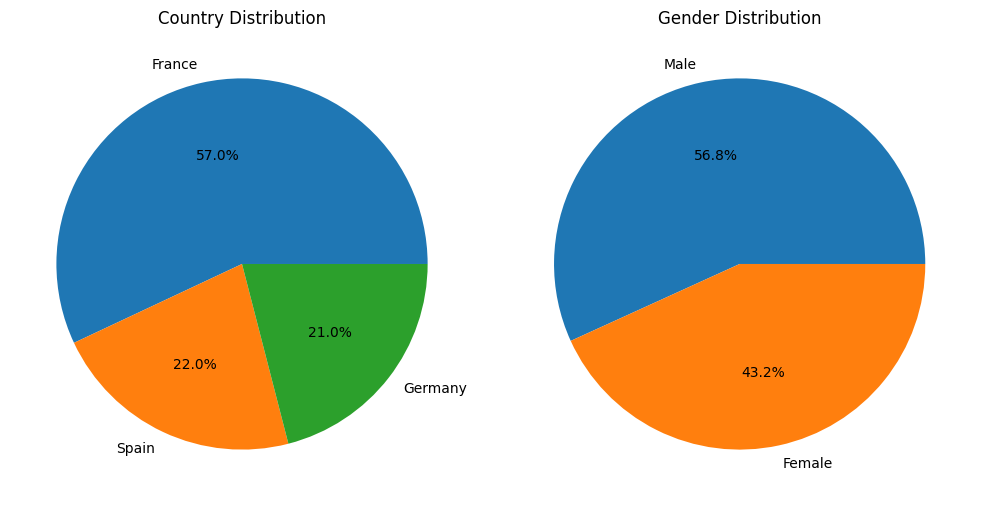

In [ ]:
country_counts = x_train['Geography'].value_counts()
gender_counts = x_train['Gender'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(country_counts, labels = country_counts.index, autopct='%1.1f%%')
axs[0].set_title('Country Distribution')

axs[1].pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%')
axs[1].set_title('Gender Distribution')

plt.tight_layout()

plt.show()

Chart 3: Dari pie chart ini kita bisa melihat distribusi dari kolom data Categorical Geography dan Gender. Dari Geography, France mendominasi data dengan 57% distribusi dan diikuti dengan Spain sebanyak 22% dan Germany sebanyak 20.9%. Dari pie chart Gender, bisa di lihat bahwa data Male lebih banyak 6.6% dari data Female.

In [ ]:
binary_encode = {"Gender": {"Male" : 1,"Female" : 0}}
x_train = x_train.replace(binary_encode)
x_val = x_val.replace(binary_encode)
x_test = x_test.replace(binary_encode)

In [ ]:
filename_gender = 'gender_encode.pkl'
pkl.dump(binary_encode, open(filename_gender, 'wb'))

In [ ]:
label_encode = {"Geography": {"France" : 0,"Germany" : 1, "Spain": 2}}
x_train = x_train.replace(label_encode)
x_val = x_val.replace(label_encode)
x_test = x_test.replace(label_encode)

In [ ]:
filename_label_encode = 'label_encode.pkl'
pkl.dump(label_encode, open(filename_label_encode, 'wb'))

Binary encoding dilakukan kepada kolom "Gender" karena valuenya hanya ada 2 yaitu Male atau Female. One Hot Encoding dilakukan kepada kolom "Geography" karena ada 3 value yaitu France, Spain dan Germany dan data tersebut bukanlah data ordinals maka One Hot Encoding digunakan (bukan label encoding).

In [ ]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3465,592.0,1,0,28.0,5,122934.72,2,0,0,111835.93
4132,714.0,0,1,51.0,4,0.00,2,1,1,19700.24
23418,595.0,0,0,43.0,10,0.00,1,1,0,181461.46
33727,678.0,2,0,29.0,9,0.00,1,1,0,172939.30
4672,645.0,2,1,26.0,4,0.00,2,1,0,91573.19


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33006 entries, 3465 to 12270
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      33006 non-null  float64
 1   Geography        33006 non-null  int64  
 2   Gender           33006 non-null  int64  
 3   Age              33006 non-null  float64
 4   Tenure           33006 non-null  int64  
 5   Balance          33006 non-null  float64
 6   NumOfProducts    33006 non-null  int64  
 7   HasCrCard        33006 non-null  int64  
 8   IsActiveMember   33006 non-null  int64  
 9   EstimatedSalary  33006 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 2.8 MB


In [ ]:
x_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import RobustScaler

numerical_columns = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
                'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

scaler = RobustScaler()

x_train_scaled = scaler.fit_transform(x_train[numerical_columns])
x_test_scaled = scaler.transform(x_test[numerical_columns])
x_val_scaled = scaler.transform(x_val[numerical_columns])

x_train_scaled_df = pd.DataFrame(x_train_scaled, columns = numerical_columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns = numerical_columns)
x_val_scaled_df = pd.DataFrame(x_val_scaled, columns = numerical_columns)

In [ ]:
filename_scale = 'scaler.pkl'
pkl.dump(scaler, open(filename_scale, 'wb'))

In [ ]:
x_train_scaled_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.605263,1.0,-1.0,-0.9,0.00,1.022464,0.0,-1.0,-1.0,-0.088178
1,0.464912,0.0,0.0,1.4,-0.25,0.000000,0.0,0.0,0.0,-1.225912
2,-0.578947,0.0,-1.0,0.6,1.25,0.000000,-1.0,0.0,-1.0,0.771591
3,0.149123,2.0,-1.0,-0.8,1.00,0.000000,-1.0,0.0,-1.0,0.666355
4,-0.140351,2.0,0.0,-1.1,-0.25,0.000000,0.0,0.0,-1.0,-0.338391


Robust Scaler dilakukan karena adanya skala angka yang lumayan jauh lebih besar seperti CustomerId, Balance, EstimatedSalary, daripada kolom lainnya. Standard Scaler juga digunakan karena adanya beberapa outlier yang ditemukan pada kolom CreditScore, Age dan NumOfProducts, dimana Robust Scaler merupakan salah satu metode yang bagus untuk dilakukan jika adanya beberapa outlier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = 10)
RF_class.fit(x_train_scaled_df, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
y_predict_rf = RF_class.predict(x_test_scaled_df)

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report Random Forest:\n')
print(classification_report(y_test, y_predict_rf, target_names=['0','1']))


Classification Report Random Forest:

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      3265
           1       0.79      0.54      0.64       861

    accuracy                           0.87      4126
   macro avg       0.84      0.75      0.78      4126
weighted avg       0.87      0.87      0.86      4126



In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy'],
    'max_depth':[10,15],
    'n_estimators':[100, 150]
}

In [ ]:
RF_class2 = RandomForestClassifier()
RF_class2 = GridSearchCV(RF_class2 ,
                            param_grid = parameters,   # hyperparameters
                            scoring = 'accuracy',        # metric for scoring
                            cv = 5)

In [ ]:
RF_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", RF_class2.best_params_)
print("Accuracy :",RF_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 150}
Accuracy : 0.8632065423335333


In [ ]:
RF_class_tuned = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', max_depth = 10)

In [ ]:
RF_class_tuned.fit(x_train_scaled_df, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=150)

In [ ]:
y_predict_rf_tuned = RF_class_tuned.predict(x_test_scaled_df)

from sklearn.metrics import classification_report
print('\nClassification Report Random Forest (tuned):\n')
print(classification_report(y_test, y_predict_rf_tuned, target_names=['0','1']))


Classification Report Random Forest (tuned):

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      3265
           1       0.79      0.53      0.63       861

    accuracy                           0.87      4126
   macro avg       0.84      0.75      0.78      4126
weighted avg       0.87      0.87      0.86      4126



In [ ]:
from xgboost import XGBClassifier
XGClass = XGBClassifier(objective='binary:logistic',
                    n_estimators=100,
                    learning_rate=0.1,
                    max_depth=5,
                    subsample=0.8,
                    colsample_bytree=0.7,
                    )

In [ ]:
XGClass.fit(x_train_scaled_df, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_predict_xg = XGClass.predict(x_test_scaled_df)

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report XGBoost:\n')
print(classification_report(y_test, y_predict_xg, target_names=['0','1']))


Classification Report XGBoost:

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      3265
           1       0.77      0.55      0.64       861

    accuracy                           0.87      4126
   macro avg       0.83      0.75      0.78      4126
weighted avg       0.87      0.87      0.86      4126



In [ ]:
filename = 'RF_model.pkl'
pkl.dump(RF_class, open(filename, 'wb'))

Karena semua model memiliki nilai precision, recall, f1 score dan akurasi yang hampir sama semua. Random Forest dipilih sebagai model yang akan disimpan dalam pickle.